In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
data_frame = pd.read_csv("E:/environment/git/AI/ML/Data/Loan Data of Dreaming Housing Finance/train.csv")

In [3]:
data_frame.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
data_frame.describe() #get summeries of variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data_frame.apply(lambda x: sum(x.isnull()),axis=0)  #check missing value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data manipulation

In [6]:
#check some columns that have null values:
#data_frame['Gender'].value_counts() #-> 489 Male vs 112 Female
#data_frame['Married'].value_counts() #-> 398 Yes vs 213 No
#data_frame['Self_Employed'].value_counts() #-> 500 No, 82 Yes => could replace null by No
#data_frame['Credit_History'].value_counts() #-> 475 1.0 vs 89 0.0 => couldd replace null by 1.0
#data_frame['Property_Area'].value_counts()

In [7]:
#replace null values

#replace null values of Self_employed to No 
data_frame['Self_Employed'].fillna('No',inplace = True)
#replace null values of Credit_History to 1.0
data_frame['Credit_History'].fillna(1.0,inplace = True)
#replace null values of Credit_History to 1.0
data_frame['Gender'].fillna('Male',inplace = True)
#replace null values of Credit_History to 1.0
data_frame['Married'].fillna('Yes',inplace = True)
#replace null values of LoanAmount to mean value of its
data_frame['LoanAmount'].fillna(data_frame['LoanAmount'].mean(), inplace=True)
#replace null values of Loan_Amount_Term to mean value of its
data_frame['Loan_Amount_Term'].fillna(data_frame['Loan_Amount_Term'].mean(), inplace=True)

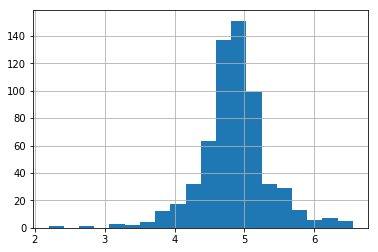

In [8]:
#rescale some vairables
data_frame['LoanAmount_log'] = np.log(data_frame['LoanAmount'])
data_frame['TotalIncome'] = data_frame['ApplicantIncome'] + data_frame['CoapplicantIncome']
data_frame['TotalIncome_log'] = np.log(data_frame['TotalIncome'])
data_frame['LoanAmount_log'].hist(bins=20) 

In [9]:
#convert all our categorical variables into numeric by encoding the categories
from sklearn.preprocessing import LabelEncoder
var_mod = ['Education','Self_Employed','Property_Area','Gender','Married','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data_frame[i] = le.fit_transform(data_frame[i])
data_frame.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

# Model's creation and training

In [10]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  
  #Print feature importance:
  feature_importance = pd.Series(model.feature_importances_,predictors).sort_values(ascending=True)
  feature_importance.plot(kind='bar', title='Feature Importances')
  plt.ylabel('Feature Importance Score')
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\Users\DatGatto\Anaconda2\envs\fastai\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\DatGatto\Anaconda2\envs\fastai\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
outcome_var = 'Loan_Status'

Accuracy : 89.414%
Cross-Validation Score : 78.182%


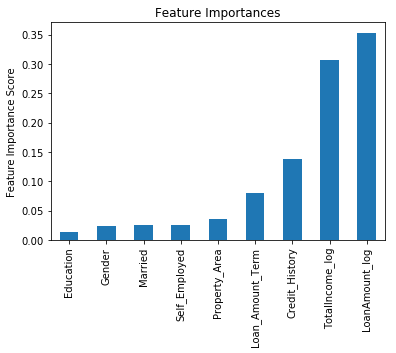

In [12]:
predictor_var = ['Education','Self_Employed','Property_Area','Married','Gender','Credit_History','LoanAmount_log','TotalIncome_log','Loan_Amount_Term']

#First try
model = GradientBoostingClassifier(random_state=10)
classification_model(model, data_frame ,predictor_var,outcome_var)

# Deeper understanding in tuning parameters

*Following the post: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/ 

The overall parameters can be divided into 3 categories:

A)Tree-Specific Parameters: These affect each individual tree in the model.
B)Boosting Parameters: These affect the boosting operation in the model.
C)Miscellaneous Parameters: Other parameters for overall functioning.

A)Tree-Specific Parameters:
1) min_samples_split
    Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
    Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    Too high values can lead to under-fitting hence, it should be tuned using CV.
2) min_samples_leaf
    Defines the minimum samples (or observations) required in a terminal node or leaf.
    Used to control over-fitting similar to min_samples_split.
    Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
3) min_weight_fraction_leaf
    Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
    Only one of #2 and #3 should be defined.
4) max_depth
    The maximum depth of a tree.
    Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    Should be tuned using CV.
5) max_leaf_nodes
    The maximum number of terminal nodes or leaves in a tree.
    Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    If this is defined, GBM will ignore max_depth.
6) max_features
    The number of features to consider while searching for a best split. These will be randomly selected.
    As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
    Higher values can lead to over-fitting but depends on case to case.

*GBM algorithm :
1. Initialize the outcome
2. Iterate from 1 to total number of trees
  2.1 Update the weights for targets based on previous run (higher for the ones mis-classified)
  2.2 Fit the model on selected subsample of data
  2.3 Make predictions on the full set of observations
  2.4 Update the output with current results taking into account the learning rate
3. Return the final output.

B) Boosting Parameters:
1) learning_rate
    This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
    Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
    Lower values would require higher number of trees to model all the relations and will be computationally expensive.
2) n_estimators
    The number of sequential trees to be modeled (step 2)
    Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
3) subsample
    The fraction of observations to be selected for each tree. Selection is done by random sampling.
    Values slightly less than 1 make the model robust by reducing the variance.
    Typical values ~0.8 generally work fine but can be fine-tuned further.

C) Miscellaneous Parameters:

1) loss
    It refers to the loss function to be minimized in each split.
    It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
2) init
    This affects initialization of the output.
    This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.
3) random_state
    The random number seed so that same random numbers are generated every time.
    This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
    It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.
4) verbose
    The type of output to be printed when the model fits. The different values can be:
    0: no output generated (default)
    1: output generated for trees in certain intervals
    >1: output generated for all trees
5) warm_start
    This parameter has an interesting application and can help a lot if used judicially.
    Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications
6) presort 
    Select whether to presort data for faster splits.
    It makes the selection automatically by default but it can be changed if needed.

TUNNING PROCESS:
 -Step1: Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
 -Step2: Determine the optimum number of trees for this learning rate. This should range around 40-70. 
 -Step3: Tune tree-specific parameters for decided learning rate and number of trees.
 -Step4: Lower the learning rate and increase the estimators proportionally to get more robust models.

*note: GBM is robust enough to not overfit with increasing trees, but a high number for pa particular learning rate can lead to overfitting. But as we reduce the learning rate and increase trees, the computation becomes expensive and would take a long time to run on standard personal computers.

In [65]:
#Step 1: Choose learning_rate = 0.1
chosen_learning_rate = 0.2

In [71]:
#Step 2: Find the number of estimators:
#We fixed the learning_rate = 0.1 then test along estimators from 20 to 80 in steps of 10
'''
*note:Fix learning rate and number of estimators for tuning tree-based parameters.In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:
- min_samples_split = 6 : This should be ~0.5-1% of total values. 
- min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
- max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. 
- max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
- subsample = 0.8 : This is a commonly used used start value
'''
param_test1 = {'n_estimators':[i for i in range(20,81,10)]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=chosen_learning_rate, min_samples_split=6,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(data_frame[predictor_var],data_frame[outcome_var])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.73701, std: 0.04153, params: {'n_estimators': 20},
  mean: 0.74215, std: 0.04078, params: {'n_estimators': 30},
  mean: 0.73743, std: 0.04273, params: {'n_estimators': 40},
  mean: 0.74308, std: 0.03552, params: {'n_estimators': 50},
  mean: 0.74228, std: 0.03710, params: {'n_estimators': 60},
  mean: 0.74078, std: 0.03601, params: {'n_estimators': 70},
  mean: 0.73953, std: 0.03644, params: {'n_estimators': 80}],
 {'n_estimators': 50},
 0.7430805520588801)

In [ ]:
#Step3
#Test Tree-specific parameter:
#*note: variables should be tested with higher impact on outcome first: For examples:
#    1.Tune max_depth and num_samples_split
#    2.Tune min_samples_leaf
#    3.Tune max_features

In [74]:
#Step 3.1: We would test max_depth in the range from 5 to 15 in steps of 2 , min_samples_split in range from 2 to 7 with learning_rate = 0.1 and n_estimators=50 (as the result of the previous step)
param_test2 = {'max_depth':[i for i in range(5,16,2)], 'min_samples_split':[i for i in range(2,8,1)]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(data_frame[predictor_var],data_frame[outcome_var])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.74469, std: 0.03944, params: {'max_depth': 5, 'min_samples_split': 2},
  mean: 0.75633, std: 0.03508, params: {'max_depth': 5, 'min_samples_split': 3},
  mean: 0.74592, std: 0.04070, params: {'max_depth': 5, 'min_samples_split': 4},
  mean: 0.73856, std: 0.05842, params: {'max_depth': 5, 'min_samples_split': 5},
  mean: 0.73906, std: 0.04769, params: {'max_depth': 5, 'min_samples_split': 6},
  mean: 0.74440, std: 0.05333, params: {'max_depth': 5, 'min_samples_split': 7},
  mean: 0.72824, std: 0.05916, params: {'max_depth': 7, 'min_samples_split': 2},
  mean: 0.73603, std: 0.05635, params: {'max_depth': 7, 'min_samples_split': 3},
  mean: 0.74568, std: 0.03921, params: {'max_depth': 7, 'min_samples_split': 4},
  mean: 0.73331, std: 0.04295, params: {'max_depth': 7, 'min_samples_split': 5},
  mean: 0.74207, std: 0.05233, params: {'max_depth': 7, 'min_samples_split': 6},
  mean: 0.74202, std: 0.05629, params: {'max_depth': 7, 'min_samples_split': 7},
  mean: 0.74435, std: 0.0355

In [84]:
#Step 3.2 :We would test min_samples_leaf in range from 3 to 30 in steps of 3  with learning_rate= 0.1, n_estimators= 50, max_depth= 5, min_samples_split= 3 (as the result of the previous steps)
param_test3 = {'min_samples_leaf':[i for i in range(3,30,3)]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=5,min_samples_split=3,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(data_frame[predictor_var],data_frame[outcome_var])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.74144, std: 0.04093, params: {'min_samples_leaf': 3},
  mean: 0.75394, std: 0.03808, params: {'min_samples_leaf': 6},
  mean: 0.75067, std: 0.02882, params: {'min_samples_leaf': 9},
  mean: 0.74531, std: 0.04388, params: {'min_samples_leaf': 12},
  mean: 0.74389, std: 0.04086, params: {'min_samples_leaf': 15},
  mean: 0.73671, std: 0.04025, params: {'min_samples_leaf': 18},
  mean: 0.73454, std: 0.03935, params: {'min_samples_leaf': 21},
  mean: 0.73061, std: 0.03965, params: {'min_samples_leaf': 24},
  mean: 0.73313, std: 0.03721, params: {'min_samples_leaf': 27}],
 {'min_samples_leaf': 6},
 0.7539400821057167)

Accuracy : 87.134%
Cross-Validation Score : 78.831%


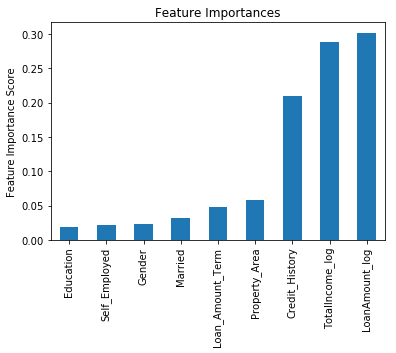

In [85]:
#Fit with model for a look:
classification_model(gsearch3.best_estimator_, data_frame ,predictor_var,outcome_var)

#*comment: here importance has been more equally distributed between features

In [86]:
#Step 3.3 :We would test max_features in range from 2 to 9 with learning_rate= 0.1, n_estimators= 50, max_depth= 5, min_samples_split= 3, min_samples_leaf= 6 (as the result of the previous steps)
param_test4 = {'max_features':[i for i in range(3,10)]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=5,min_samples_split=3, min_samples_leaf=6, subsample=0.8, random_state=10), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(data_frame[predictor_var],data_frame[outcome_var])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.75394, std: 0.03808, params: {'max_features': 3},
  mean: 0.74971, std: 0.04209, params: {'max_features': 4},
  mean: 0.74248, std: 0.04423, params: {'max_features': 5},
  mean: 0.75603, std: 0.05373, params: {'max_features': 6},
  mean: 0.74157, std: 0.04263, params: {'max_features': 7},
  mean: 0.74241, std: 0.04227, params: {'max_features': 8},
  mean: 0.74235, std: 0.04124, params: {'max_features': 9}],
 {'max_features': 6},
 0.7560346000748478)

In [ ]:
#Step 4:

In [87]:
#Step 4.1:Testing subsample values:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=5,min_samples_split=3, min_samples_leaf=6,max_features=6, random_state=10),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(data_frame[predictor_var],data_frame[outcome_var])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.73930, std: 0.03491, params: {'subsample': 0.6},
  mean: 0.75149, std: 0.05114, params: {'subsample': 0.7},
  mean: 0.74234, std: 0.05065, params: {'subsample': 0.75},
  mean: 0.75603, std: 0.05373, params: {'subsample': 0.8},
  mean: 0.75334, std: 0.04515, params: {'subsample': 0.85},
  mean: 0.74924, std: 0.05201, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.7560346000748478)

Accuracy : 87.134%
Cross-Validation Score : 78.831%


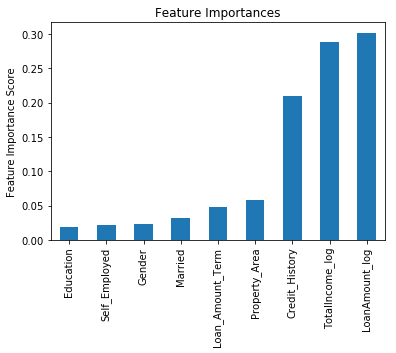

In [88]:
classification_model(gsearch3.best_estimator_, data_frame ,predictor_var,outcome_var)

Accuracy : 88.111%
Cross-Validation Score : 79.479%


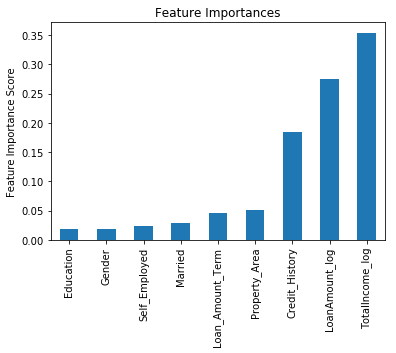

In [89]:
#Step 4.2: Lower learning rate and increase number of estimators with the same proportion.
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=5, min_samples_split=3,min_samples_leaf=6, max_features=6, subsample=0.8, random_state=10)
classification_model(gbm_tuned_1, data_frame ,predictor_var,outcome_var)

Accuracy : 88.274%
Cross-Validation Score : 78.990%


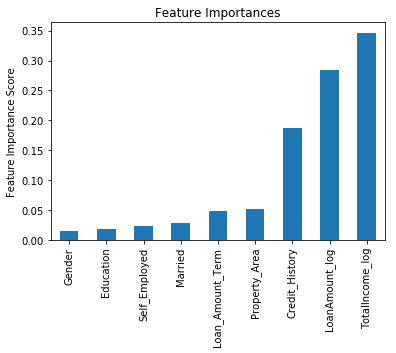

In [17]:
#Step 4.2': Lower learning rate and increase number of estimators with the same proportion again.
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.0005, n_estimators=10000,max_depth=5, min_samples_split=3,min_samples_leaf=6, max_features=6, subsample=0.8, random_state=10)
classification_model(gbm_tuned_1, data_frame ,predictor_var,outcome_var)

Accuracy : 94.625%
Cross-Validation Score : 76.713%


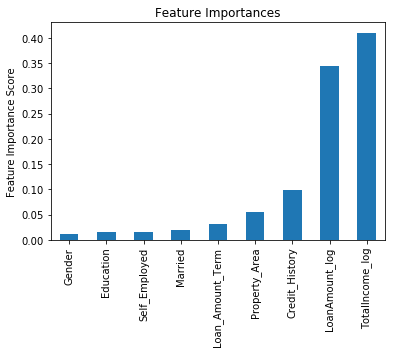

In [16]:
#Step 4.2': Test again other learning rate
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=50,max_depth=5, min_samples_split=3,min_samples_leaf=6, max_features=6, subsample=0.8, random_state=10)
classification_model(gbm_tuned_1, data_frame ,predictor_var,outcome_var)

In [ ]:
#=> Need retuning with learning_rate = 0.2